In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

### 1. Create matrix of mitochondrial-related-genes for all samples. row = sample, column = gene

In [3]:
#gtex = "GTEX_3282_sample_phenotype.txt"
#rows = "mitonuclear_genes_rowNumber_id.txt"

In [ ]:
# (-2) because Pandas assign "row 0" to the second line in the actual file.

#rowIdNucGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows))]
#rowIdMitGenes = range(198582,198619)
#rowIdNumts = range(198619,198681)

In [ ]:
#matrix = pd.DataFrame()
#
#with open (gtex) as samples:
#    for sample in samples:
#        individual, accession, tissue = sample.strip().split('\t')[:3]
#        current_tsv = accession+".tsv"
#        current_dataframe = pd.read_csv(current_tsv,sep="\t")
#        current_dataframe = current_dataframe.tpm[rowIdNucGenes+rowIdMitGenes+rowIdNumts].transpose()
#        out = pd.Series([individual,tissue]).append(current_dataframe)
#        matrix = matrix.append(out,ignore_index=True)

In [ ]:
#matrix.to_csv("mitonuc_mito_numt_tpm_matrix_3282.txt",sep="\t",header=False,index=False)

In [175]:
rows = "mitonuclear_genes_rowNumber_id.txt"
rowIdNucGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows))]
rowIdMitGenes = range(198582,198619)
rowIdNumts = range(198619,198681)
allrows = rowIdNucGenes+rowIdMitGenes+rowIdNumts


sample = pd.read_csv("SRR1068687.tsv",sep="\t")
sample = sample.target_id[allrows]

In [185]:
sample_names = [name.split("|")[5] if len(name.split("|"))>1 else "_".join(name.split("_")[3:5]) for name in sample.tolist()]

In [193]:
sample_names[1145]

'MT-CO2'

### 2. Or simply read the generated file from the previous step back into pandas

In [4]:
data = pd.read_csv("mitonuc_mito_numt_tpm_matrix_3282.txt",sep="\t",header=None)

In [4]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227
0,GTEX-PW2O,Lung,7.23699,5.74038,5.700390,5.00871,0.419514,0.000000,17.72050,6.40239,...,0.998642,0.215575,0.551711,0.218645,0.209721,0.092530,0.016143,0.232226,0.019994,0.070703
1,GTEX-NPJ8,Brain - Amygdala,4.18626,3.20400,0.734798,2.39418,0.000000,0.048411,9.12054,14.00450,...,0.332928,0.097586,0.262505,0.294960,0.091306,0.041676,0.384496,0.012646,0.074043,0.059121


### 3. (optional) PCA using matplotlib PCA function

In [7]:
npmatrix = data.iloc[:,2:].as_matrix()

In [8]:
from matplotlib.mlab import PCA

In [9]:
myPCA = PCA(npmatrix)

In [6]:
# Index of mitochondrial genes in an array of 37 elements

protein = [i-1 for i in [6,10,16,19,21,22,23,25,27,28,32,33,35]]
tRNA = [i-1 for i in [1,3,5,7,8,9,11,15,17,18,20,24,26,29,30,31,34,36,37]]
rRNA = [i-1 for i in [2,4]]

In [42]:
# Y is the original datamatrix expressed in terms of the principal component axes
shape(myPCA.Y)

(3282, 1226)

In [15]:
# number of components
len(myPCA.fracs)

1226

In [51]:
# fraction of variance explained by the first two components
myPCA.fracs[:10]*100

array([ 17.96774155,   8.38751797,   7.62372733,   4.63128192,
         4.40639007,   3.34598273,   3.05943988,   2.34554124,
         2.18265952,   1.86714932])

In [55]:
sum(myPCA.fracs)

1.0000000000000002

Populating the interactive namespace from numpy and matplotlib


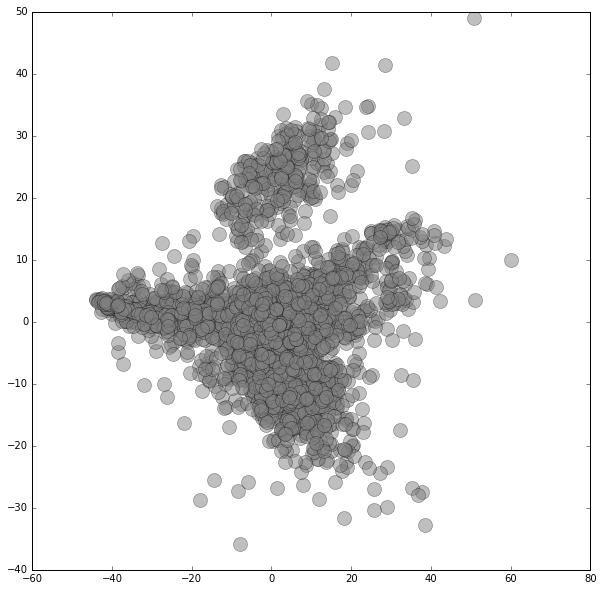

In [50]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

# PCA1 and PCA2 for all samples, using genes to identify variation
# There are 3282 points in the data cloud. They represent ALL samples in the GTEx.


plt.plot(myPCA.Y[:,0],myPCA.Y[:,1],'o',markersize=14, color='grey', alpha=0.5)

### PCA using sklearn PCA function

In [18]:
from sklearn.decomposition.pca import PCA

In [19]:
# PCA of matrix with rows=samples, column=genes

pca1 = PCA(n_components=2)
pca1.fit(data.iloc[:,2:])

PCA(copy=True, n_components=2, whiten=False)

In [20]:
# PCA of matrix with rows=genes, column=samples

pca2 = PCA(n_components=2)
pca2 = pca2.fit(data.iloc[:,2:].transpose())

In [21]:
pca1.explained_variance_ratio_

array([ 0.80949468,  0.06984046])

In [22]:
pca2.explained_variance_ratio_

array([ 0.92506831,  0.02808915])

In [23]:
len(pca1.components_[0])

1226

In [24]:
len(pca2.components_[0])

3282

In [54]:
pca2.n_samples_

1226

In [25]:
# index of gene among the 37 values

protein = [i-1 for i in [6,10,16,19,21,22,23,25,27,28,32,33,35]]
tRNA = [i-1 for i in [1,3,5,7,8,9,11,15,17,18,20,24,26,29,30,31,34,36,37]]
rRNA = [i-1 for i in [2,4]]

Populating the interactive namespace from numpy and matplotlib


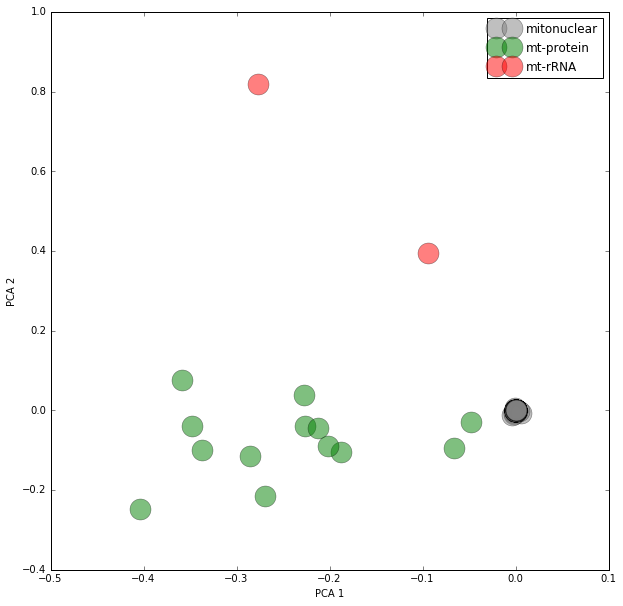

In [26]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

# PCA1 and PCA2 for all samples, using genes to identify variation

plt.plot(pca1.components_[0][0:1127],pca1.components_[1][0:1127],'o',markersize=21, color='grey', alpha=0.5,label="mitonuclear")
plt.plot(pca1.components_[0][1127:(1127+37)][protein],pca1.components_[1][1127:(1127+37)][protein],'o',markersize=21, color='green', alpha=0.5,label="mt-protein")
#plt.plot(pca1.components_[0][1127:(1127+37)][tRNA],pca1.components_[1][1127:(1127+37)][tRNA],'o',markersize=21, color='lightblue', alpha=0.5,label="mt-tRNA")
plt.plot(pca1.components_[0][1127:(1127+37)][rRNA],pca1.components_[1][1127:(1127+37)][rRNA],'o',markersize=21, color='red', alpha=0.5,label="mt-rRNA")
#plt.plot(pca1.components_[0][(1127+37):1226],pca1.components_[1][(1127+37):1226],'o',markersize=21, color='orange', alpha=0.5,label="numt")

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

Populating the interactive namespace from numpy and matplotlib


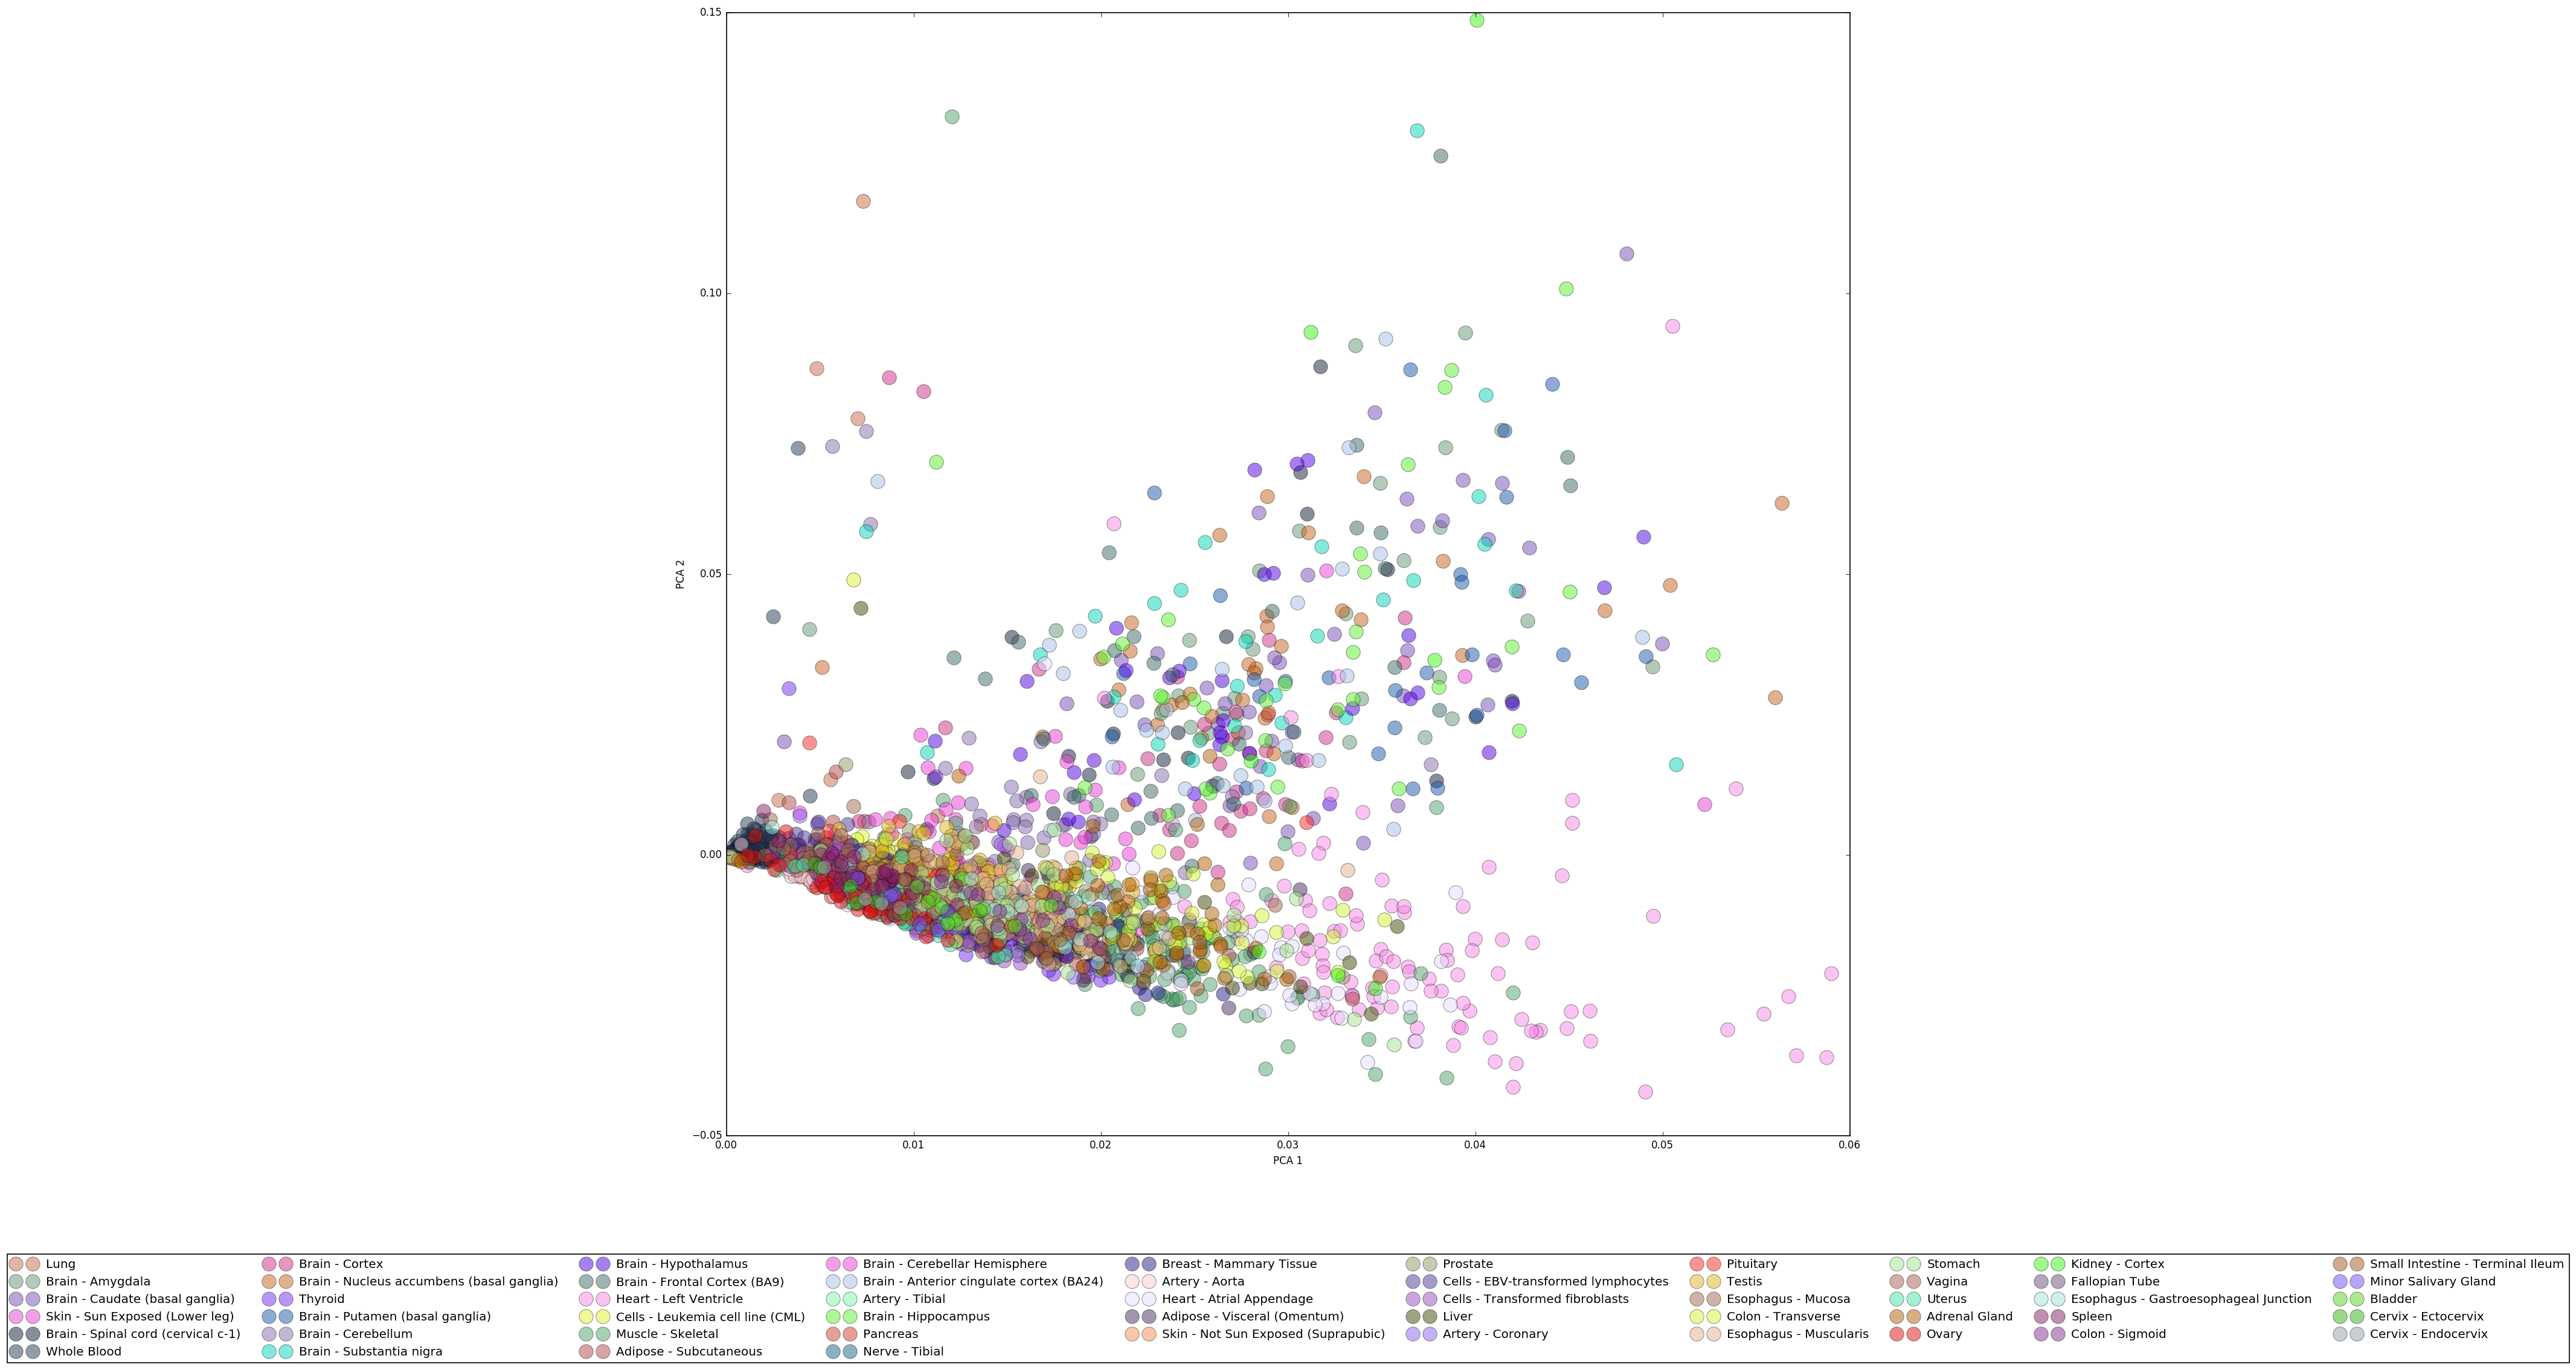

In [27]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
matplotlib.rcParams['savefig.dpi'] = 120

# PCA1 and PCA2 for all samples, using genes to identify variation
#plt.plot(pca2.components_[0],pca2.components_[1],'o',markersize=14, color='grey', alpha=0.5)
#plt.plot(pca2.components_[0][NPJ8],pca2.components_[1][NPJ8],'o',markersize=14, color='red', alpha=0.5)

#n=-1
for tissue in list(data.loc[:,1].drop_duplicates()):
    #n+=1
    current = list(data[data.loc[:,1] == tissue].index)
    plt.plot(pca2.components_[0][current],pca2.components_[1][current],'o',markersize=14, color=numpy.random.rand(3,), 
             alpha=0.5,label=tissue)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=10)

Populating the interactive namespace from numpy and matplotlib


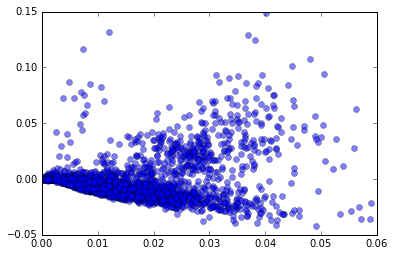

In [29]:
% pylab inline 

plt.plot(pca2.components_[0],pca2.components_[1],'o',alpha=0.5)

### Create matrix of all genes for all samples. row = sample, column = gene

In [ ]:
tmp = pd.read_csv("SRR1068687.tsv",sep="\t")
tmp.tpm.transpose().head()

In [ ]:
all_data = pd.DataFrame()

with open (gtex) as samples:
    for sample in samples:
        individual, accession, tissue = sample.strip().split('\t')[:3]
        current_tsv = accession+".tsv"
        current_dataframe = pd.read_csv(current_tsv,sep="\t")
        current_dataframe = list(current_dataframe.tpm.transpose())
        out = pd.Series([individual,tissue]+current_dataframe)
        all_data = all_data.append(out,ignore_index=True)

all_data.to_csv("all_data_tpm_matrix.txt",sep="\t",header=False,index=False)

In [ ]:
NPJ8 = list(data[data.loc[:,0] == "GTEX-NPJ8"].index)

In [ ]:
list(data.loc[:,1].drop_duplicates())

In [ ]:
Lung = list(data[data.loc[:,1] == "Lung"].index)

In [ ]:
numpy.random.rand(3,)

In [ ]:
! ls *txt

### Analysis of nuclear encoded genes variation per tissue

> - Nuclear genes are located between columns 0:1129
> - Mitochondrial genes 1129:1129+37
> - NUMTS 1129+37:end

In [22]:
! wc -l mitonuclear_genes_rowNumber_id.txt

1127 mitonuclear_genes_rowNumber_id.txt


In [5]:
mitonuclear_notbrain = data.loc[~(data.loc[:,1].str.contains("Brain")),0:1128]

In [40]:
mitonuclear_notbrain.shape

(2858, 1129)

In [41]:
mitonuclear_notbrain.head(1)

,0,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,GTEX-PW2O,Lung,7.23699,5.74038,5.70039,5.00871,0.419514,0,17.7205,6.40239,...,239.242,66.9024,0,0.336095,10.9813,6.912060e-10,1.66438,4.53302,0.628519,2.23525


In [49]:
type(list(mitonuclear_notbrain.columns)[1])

numpy.int64

Populating the interactive namespace from numpy and matplotlib


TypeError: object of type 'int' has no len()

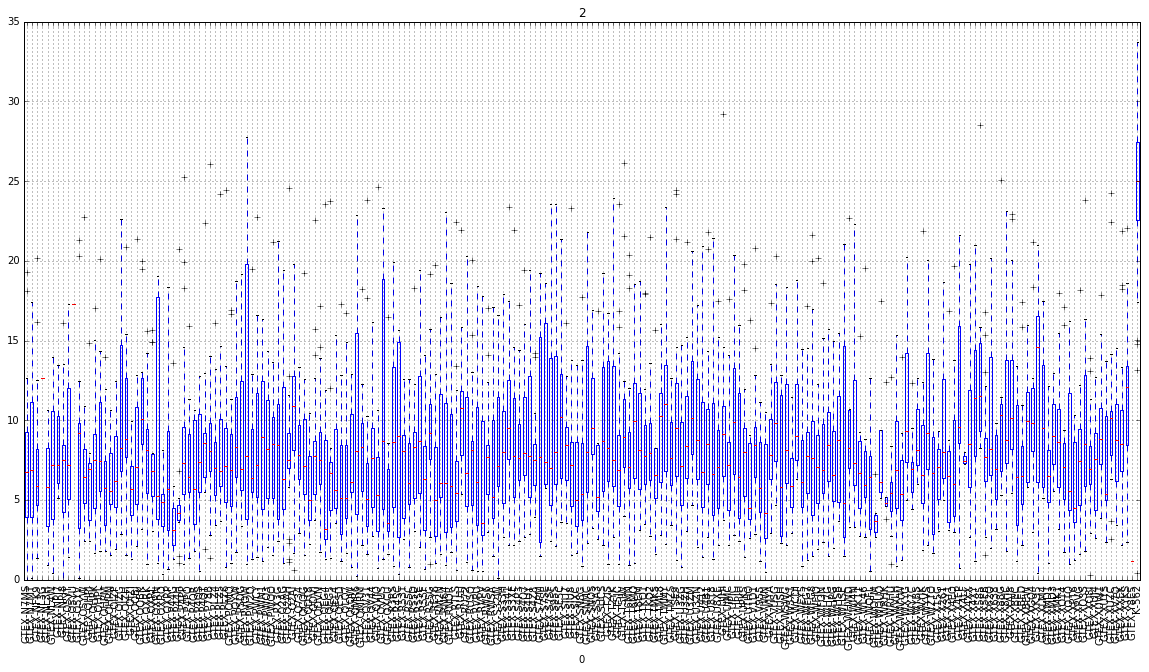

In [56]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


mitonuclear_notbrain.boxplot(column=2,by=0,rot=90)


In [1]:
import numpy as np
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


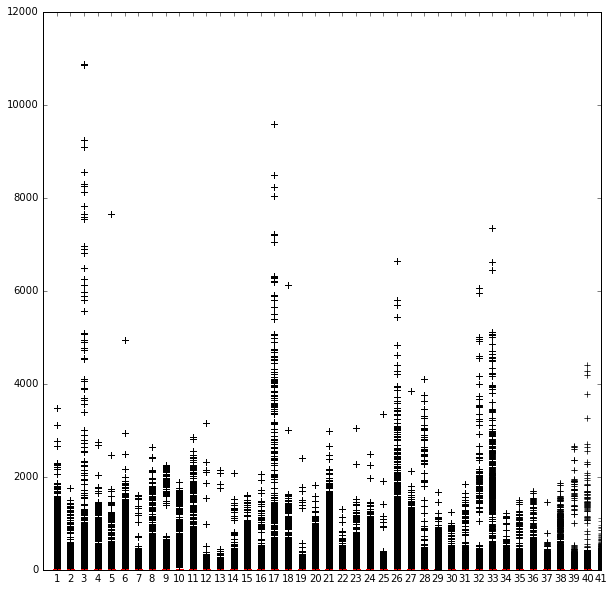

In [39]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

DATA = []

for tissue,df in mitonuclear_notbrain.groupby(by=[1]):
    v = df.loc[:,2:1128].as_matrix().flatten()
    v.sort()
    #l = [np.log(i) for i in v]
    
    fit = stats.norm.pdf(v, np.mean(v), np.std(v))

    #plt.plot(l,fit,'-')
    #plt.boxplot(np.log(v))
    #plt.hist(np.log(v))
    #break
    DATA.append(v)

    plot = plt.boxplot(DATA)
    plt.axis([0, 41, -5, 12000])


In [23]:
fit

array([ 0.00627072,  0.00627072,  0.00627072, ...,  0.        ,
        0.        ,  0.        ])

In [3]:
! head SRR1068687.tsv|cut -f 2-

length	eff_length	est_counts	tpm
1657	1451.47	15.6008	0.462275
632	426.565	0	0
1351	1145.47	461.853	17.3413
68	24.6476	0.25688	0.448245
712	506.47	0	0
535	330.006	0	0
138	26.9839	0	0
1187	981.47	0	0
590	384.646	0	0


In [12]:
! grep -v "length" SRR1068687.tsv|cut -f 3,4|awk '{print $2/$1}'|datamash sum 1

23250.865227617


In [15]:
! echo| awk '{print (15.6008* 10^6)/(23250.865227617 * 1451.47)}'

0.462274


In [16]:
! grep "AATF" SRR1068687.tsv

ENST00000619387.4|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477299.1|AATF-001|AATF|2141|protein_coding|	2141	1935.47	1484.14	32.98
ENST00000613840.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477300.1|AATF-005|AATF|648|nonsense_mediated_decay|	648	442.565	0	0
ENST00000610798.4|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477301.1|AATF-006|AATF|601|protein_coding|	601	395.646	0	0
ENST00000616434.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477302.1|AATF-007|AATF|502|protein_coding|	502	297.6	0	0
ENST00000616392.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477303.1|AATF-008|AATF|474|retained_intron|	474	270.112	0	0
ENST00000617141.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477304.1|AATF-009|AATF|586|retained_intron|	586	380.684	0	0
ENST00000622432.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT00000477305.1|AATF-004|AATF|376|processed_transcript|	376	178.623	2.05037	0.493693
ENST00000616062.1|ENSG00000275700.4|OTTHUMG00000188458.1|OTTHUMT

In [17]:
! pwd

/home/boris/boris5/amelia/dissertation/kallisto


In [20]:
! for gene in $(cat housekeeping_genes.txt);do grep ${gene} SRR1068687.tsv|grep "protein_coding"| cut -f 1|awk 'BEGIN{FS="|"}{print $2"\t"$6}';done|sort|uniq > temp_HK_list.txt

In [27]:
! for gene in $(cat housekeeping_genes.txt);do grep -w ${gene} temp_HK_list.txt;done|awk 'BEGIN{FS="."}{print $1}' > housekeeping_genes_ensembl_id.txt

In [28]:
! wc -l housekeeping_genes_ensembl_id.txt

13 housekeeping_genes_ensembl_id.txt


In [29]:
import pandas as pd

In [30]:
sampledata = pd.read_table("SRR1068687.tsv")

In [33]:
housekeeping = pd.DataFrame()

with open("housekeeping_genes_ensembl_id.txt") as hk:
    for gene in hk:
        tmp = sampledata[sampledata['target_id'].str.contains(gene.strip()) & sampledata['target_id'].str.contains("protein_coding")]
        if not tmp.empty:
            out = tmp[tmp['length'] == max(tmp['length'])]
            housekeeping = housekeeping.append(out)
        else:
            pass

In [34]:
housekeeping

,target_id,length,eff_length,est_counts,tpm
156648,ENST00000619387.4|ENSG00000275700.4|OTTHUMG000...,2141,1935.470,1484.1400,32.98000
10972,ENST00000368474.8|ENSG00000160710.15|OTTHUMG00...,6625,6419.470,1287.8100,8.62806
167858,ENST00000333511.7|ENSG00000172270.18|OTTHUMG00...,1974,1768.470,92.9917,2.26156
148554,ENST00000379378.7|ENSG00000205250.8|OTTHUMG000...,2096,1890.470,2123.7000,48.31530
60631,ENST00000446023.6|ENSG00000131446.15|OTTHUMG00...,3175,2969.470,99.0836,1.43510
169838,ENST00000301457.2|ENSG00000267855.5|OTTHUMG000...,601,395.646,259.7700,28.23860
1331,ENST00000270776.12|ENSG00000142657.20|OTTHUMG0...,1885,1679.470,1001.8500,25.65620
9656,ENST00000583313.6|ENSG00000265241.6|OTTHUMG000...,4961,4755.470,1391.1200,12.58150
185550,ENST00000270142.10|ENSG00000142168.14|OTTHUMG0...,966,760.470,4148.1000,234.60000
81247,ENST00000317827.8|ENSG00000147526.19|OTTHUMG00...,7802,7596.470,3982.0200,22.54510


In [35]:
housekeeping.to_csv("housekeeping_genes_annotation.txt",sep="\t")

In [37]:
! awk 'BEGIN{FS=OFS="\t"} NR>1 {print $1+2,$2 }' housekeeping_genes_annotation.txt |sort -k1g,1g > housekeeping_genes_rownumber_id.txt

In [83]:
gtex = "GTEX_3282_sample_phenotype.txt"
rows = "housekeeping_genes_rownumber_id.txt"
# (-2) because Pandas assign "row 0" to the second line in the actual file.

rowIdNucGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows))]
#HK = pd.DataFrame()


In [ ]:
with open (gtex) as samples:
    for sample in samples:
        individual, accession, tissue = sample.strip().split('\t')[:3]
        current_tsv = accession+".tsv"
        current_dataframe = pd.read_csv(current_tsv,sep="\t")
        current_dataframe = current_dataframe.tpm[rowIdNucGenes].transpose()
        out = pd.Series([individual,tissue]).append(current_dataframe)
        HK = HK.append(out,ignore_index=True)
HK.to_csv("housekeeping_genes_tpm_matrix_3282.txt",sep="\t",header=False,index=False)

In [87]:
current_dataframe = pd.read_csv("SRR1068687.tsv",sep="\t")

In [88]:
current_dataframe = current_dataframe.target_id[rowIdNucGenes]

In [93]:
hk_gene_names = [name.split("|")[5] for name in current_dataframe.tolist()]

In [40]:
! ls housekeeping_genes_tpm_matrix_3282.txt

housekeeping_genes_tpm_matrix_3282.txt


In [41]:
! wc -l housekeeping_genes_tpm_matrix_3282.txt 

3282 housekeeping_genes_tpm_matrix_3282.txt


In [52]:
import pandas as pd

In [53]:
HK = pd.read_csv("housekeeping_genes_tpm_matrix_3282.txt", sep="\t",header=None)

In [54]:
HK.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,GTEX-PW2O,Lung,92.2379,9.33487,13.32070,19.0070,0.000000,7.36282,100.7820,36.7098,23.0669,0.495578,23.3047,9.60972,109.053
1,GTEX-NPJ8,Brain - Amygdala,33.9931,10.58120,1.67556,17.9455,0.245230,2.64121,41.1460,10.8809,13.0656,0.457474,26.3536,8.22370,284.552
2,GTEX-N7MT,Brain - Caudate (basal ganglia),43.3681,15.68290,5.13380,25.8892,1.282730,6.19069,56.8016,19.4830,21.3160,0.962535,50.5071,6.56541,424.298
3,GTEX-OHPK,Lung,130.9470,8.89250,2.08041,16.2313,0.717692,6.79474,135.0800,48.8856,23.6561,0.639387,22.9115,7.39812,140.128
4,GTEX-Q2AG,Skin - Sun Exposed (Lower leg),42.3199,9.11587,1.92596,17.6587,0.433329,3.85487,73.3999,26.0702,26.0658,1.284970,12.1188,6.07199,134.296


Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffad6eb410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fffad077a90>]], dtype=object)

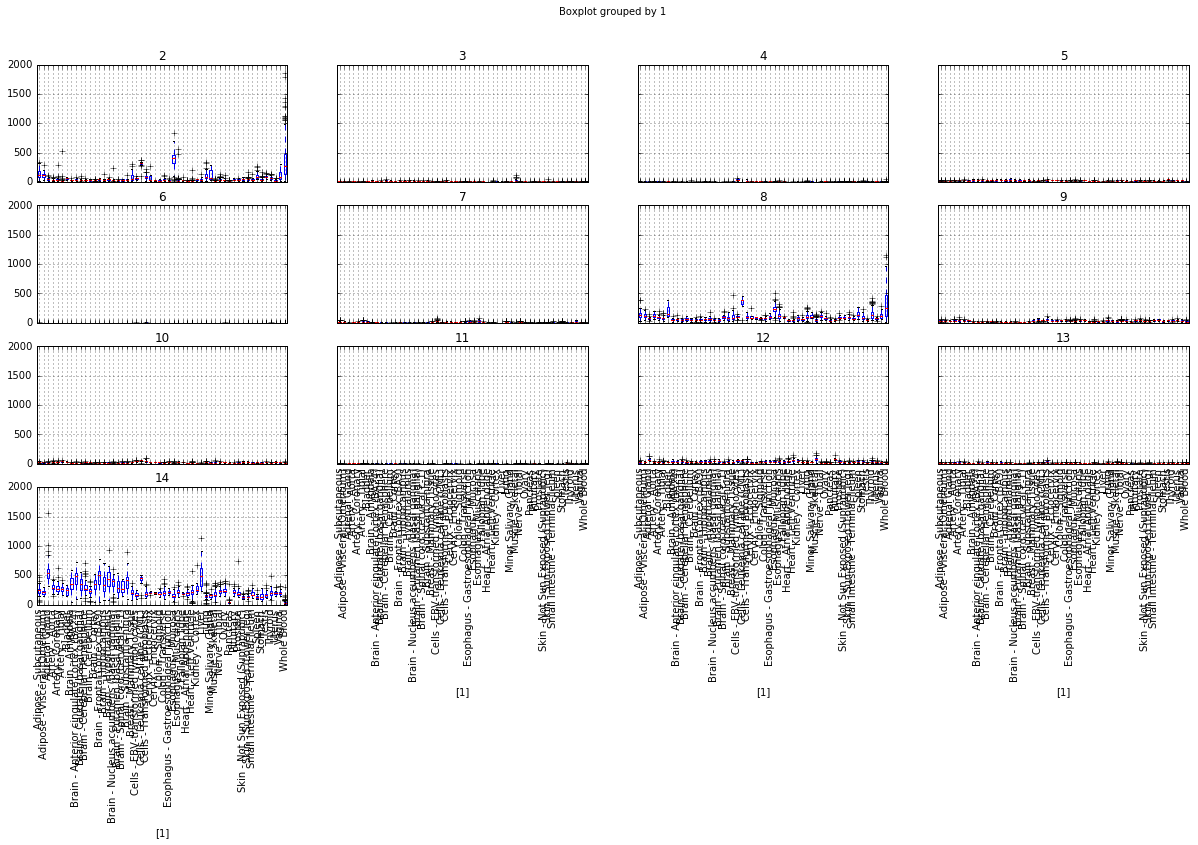

In [57]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


HK.boxplot(column=range(2,15),by=[1],rot=90)

In [58]:
import numpy as np

In [64]:
def getLog(x):
    return np.log(x+1)

In [68]:
HKLog = HK.loc[:,2:14].apply(getLog)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff7b67c210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff7a7ec3d0>]], dtype=object)

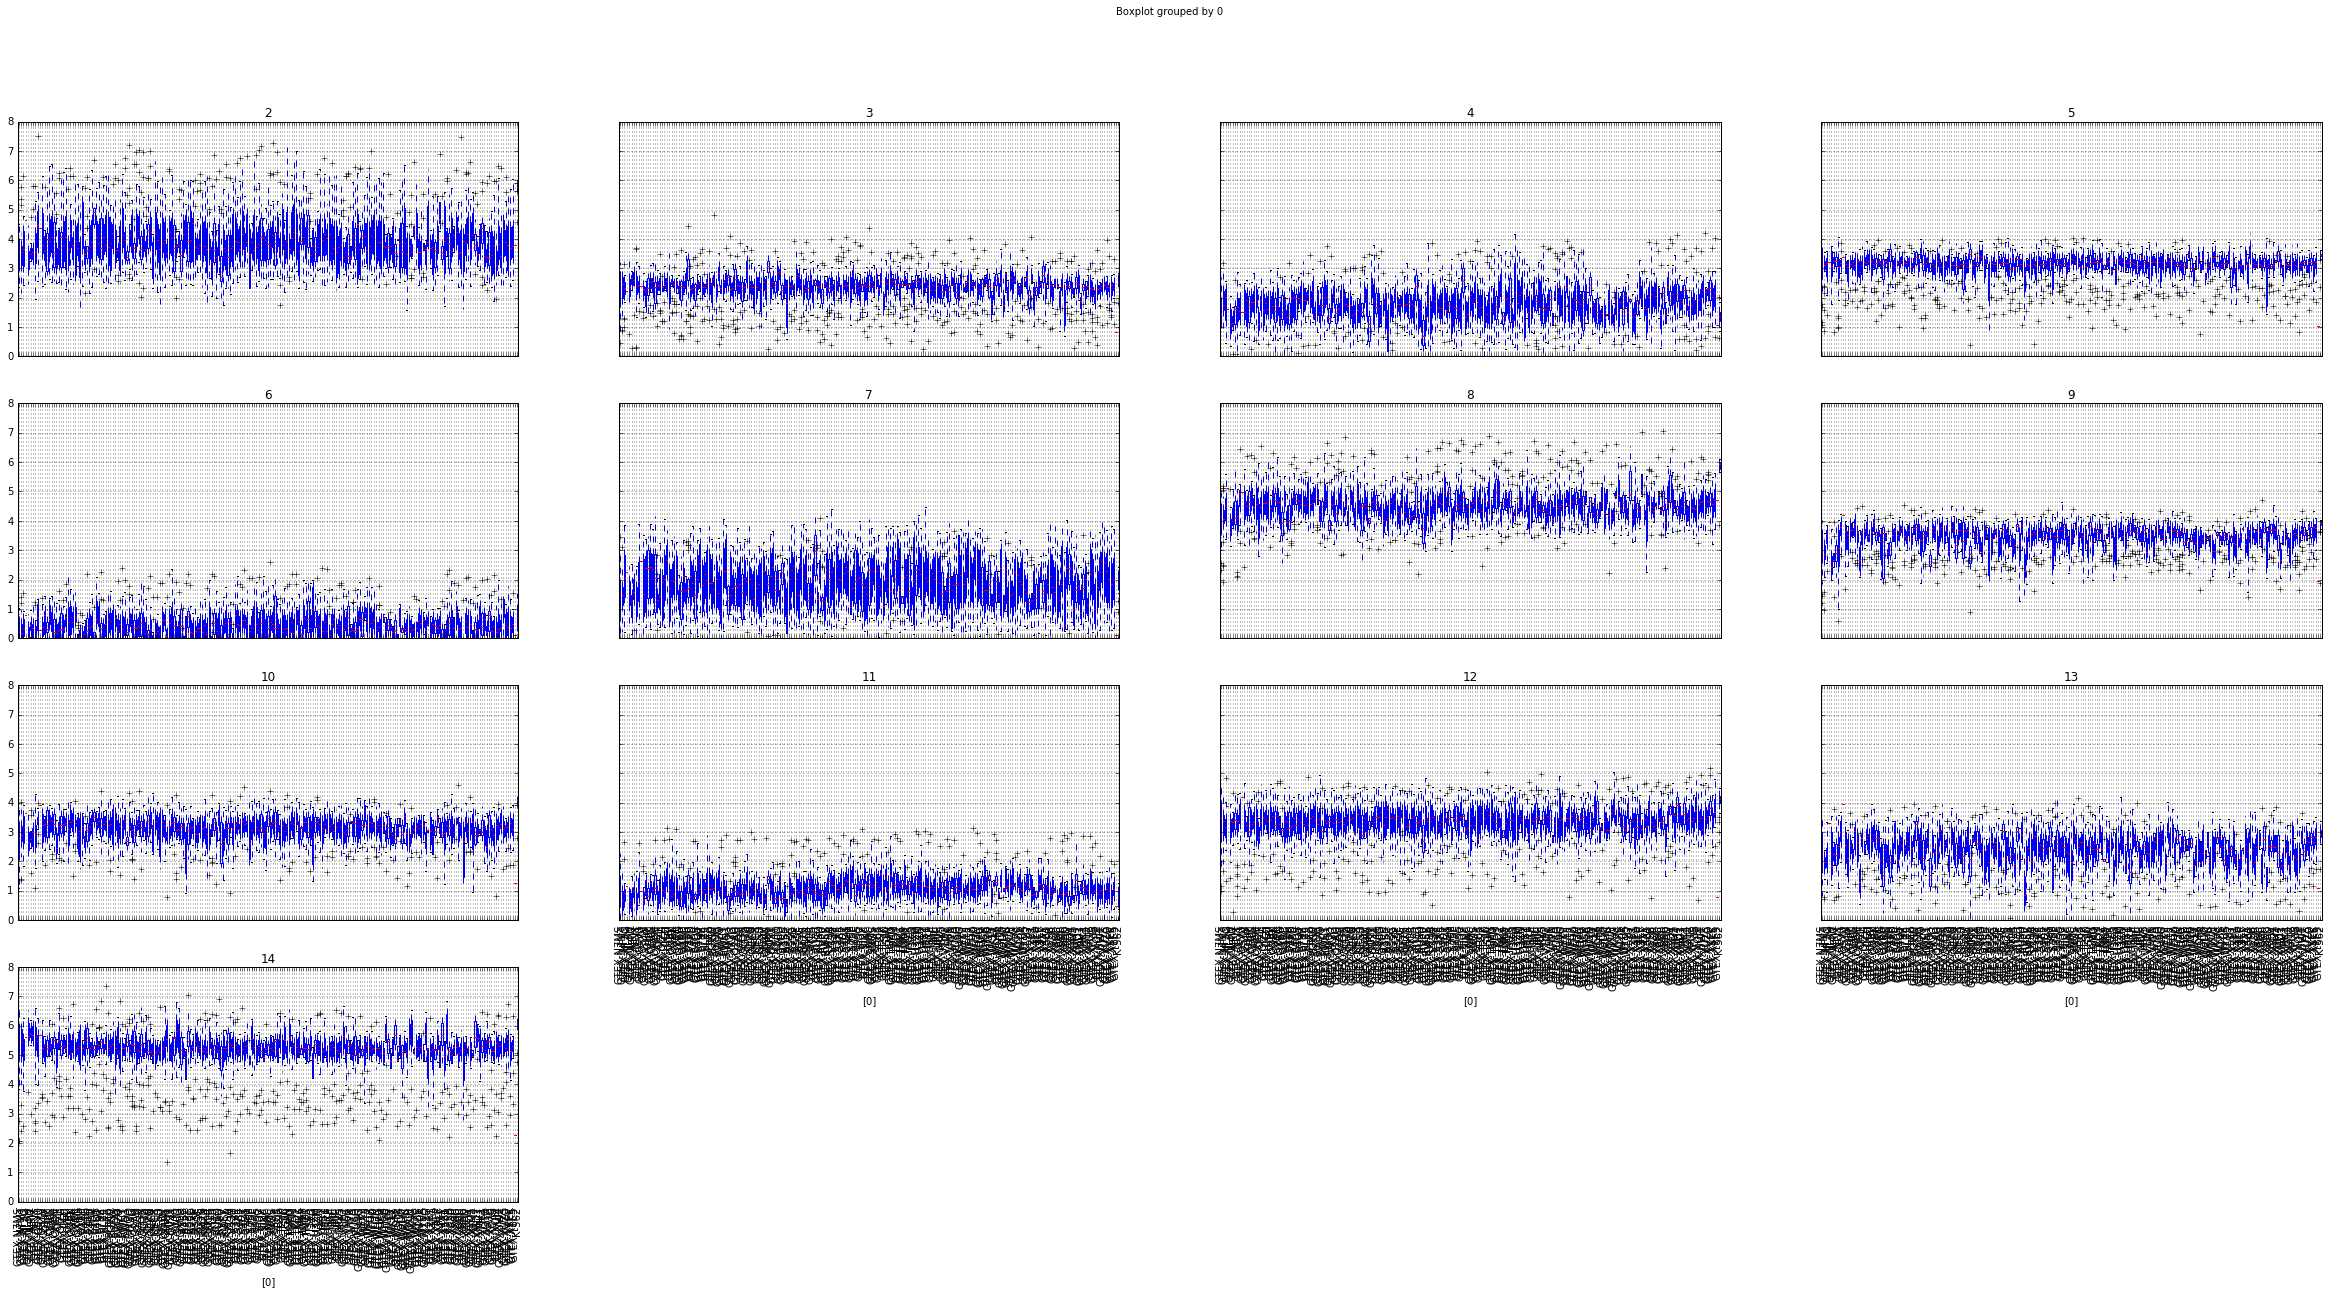

In [80]:
# Boxplot of house-keeping genes expression in all tissues of an individual. Each plot is a HK gene, so
# a flat line means constant gene expression across individuals

matplotlib.rcParams['figure.figsize'] = (40.0, 20.0)

pd.concat([HK.loc[:,0:1],HKLog],axis=1).boxplot(column=range(2,15),by=[0],rot=90)

In [81]:
HKLogDf = pd.concat([HK.loc[:,0:1],HKLog],axis=1)

In [94]:
HKLogDf.columns = ["individual","tissue"]+hk_gene_names

In [151]:
TMP = HKLogDf[HKLogDf.tissue == "Lung"].transpose().iloc[2:,:]

/home/boris/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fff4a9dcd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fff4a97bcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fff4a987fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fff4a987990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fff4a9dcf90>,
  <matplotlib.lines.Line2D at 0x7fff496faa90>]}

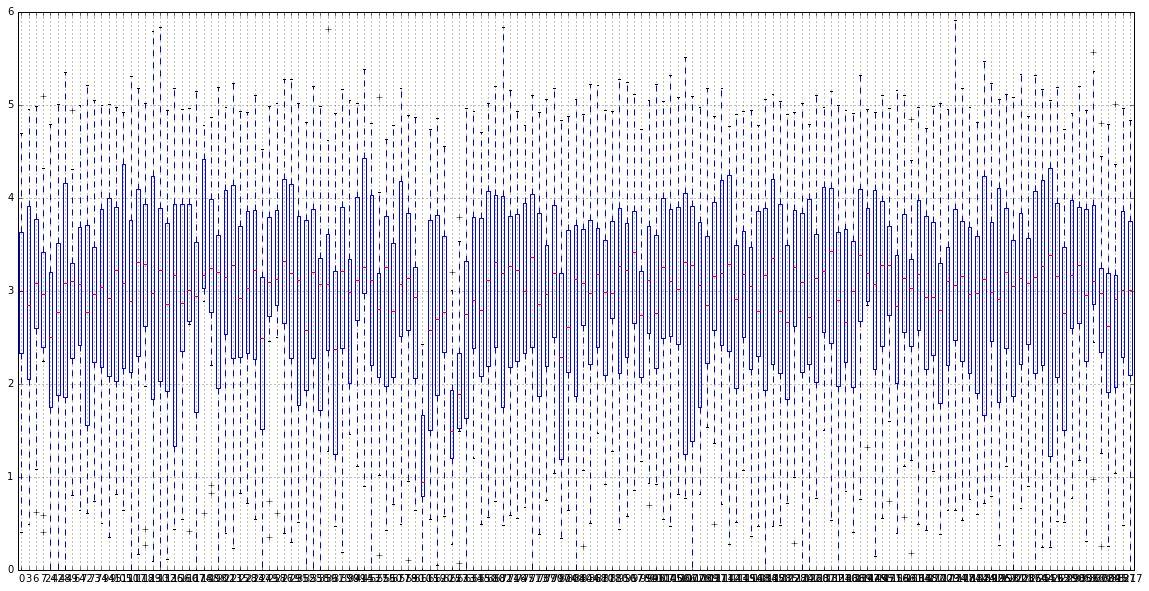

In [173]:
HKLogDf[HKLogDf.tissue == "Lung"].iloc[:,2:].transpose().boxplot()

> Divide mitochondrial gene expression by the MEDIAN expression of all 13 house keeping genes for that invididual and tissue.
> - The idea is to account for mitochondrial copy number
> - Assuming that mitochondrial gene expression is directly correlated with copy number

In [1]:
import pandas as pd

In [2]:
# to do
# 1. Add house keeping genes expression (TPM) to the large matrix with nuclear mitochondrial genes, mitochondrial and NUMTS

In [91]:
# matrix with nuclear, mitochondrial and numt TPM
data1 = pd.read_csv("mitonuc_mito_numt_tpm_matrix_3282.txt",sep="\t",header=None)
# matrix with house keeping genes
data2 = pd.read_csv("housekeeping_genes_tpm_matrix_3282.txt", sep="\t",header=None)

In [92]:
# (-2) because Pandas assign "row 0" to the second line in the actual file.

sample_data = pd.read_csv("SRR1068687.tsv",sep="\t")

# data1 column names
rows1 = "mitonuclear_genes_rowNumber_id.txt"
rowIdNucGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows1))]
rowIdMitGenes = range(198582,198619)
rowIdNumts = range(198619,198681)
allrows = rowIdNucGenes+rowIdMitGenes+rowIdNumts

d1_sample_data = sample_data.target_id[allrows]
d1_names = [name.split("|")[5] if len(name.split("|"))>1 else "_".join(name.split("_")[3:5]) for name in d1_sample_data.tolist()]

# data2 column names
rows2 = "housekeeping_genes_rownumber_id.txt"
rowIdHKGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows2))]
d2_sample_data = sample_data.target_id[rowIdHKGenes]
d2_names = [name.split("|")[5] for name in d2_sample_data.tolist()]

In [5]:
len(rowIdNucGenes)

1127

In [6]:
len(rowIdMitGenes)

37

In [7]:
len(rowIdNumts)

62

In [8]:
d1_names[1:10]

['AURKAIP1',
 'MRPL20',
 'ATAD3B',
 'ATAD3A',
 'ACOT7',
 'DNAJC11',
 'PARK7',
 'SLC25A33',
 'KIF1B']

In [9]:
len(d1_names)

1226

In [10]:
d2_names

['PGD',
 'RBM8A',
 'ADAR',
 'UBE2D2',
 'MGAT1',
 'TACC1',
 'TALDO1',
 'E2F4',
 'AATF',
 'BSG',
 'NDUFA7',
 'YWHAB',
 'SOD1']

In [11]:
len(d2_names)

13

In [12]:
data1.head(1)

,0,1,2,3,4,5,6,7,8,9,...,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227
0,GTEX-PW2O,Lung,7.23699,5.74038,5.70039,5.00871,0.419514,0,17.7205,6.40239,...,0.998642,0.215575,0.551711,0.218645,0.209721,0.09253,0.016143,0.232226,0.019994,0.070703


In [13]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,GTEX-PW2O,Lung,92.2379,9.33487,13.32070,19.0070,0.000000,7.36282,100.7820,36.7098,23.0669,0.495578,23.3047,9.60972,109.053
1,GTEX-NPJ8,Brain - Amygdala,33.9931,10.58120,1.67556,17.9455,0.245230,2.64121,41.1460,10.8809,13.0656,0.457474,26.3536,8.22370,284.552
2,GTEX-N7MT,Brain - Caudate (basal ganglia),43.3681,15.68290,5.13380,25.8892,1.282730,6.19069,56.8016,19.4830,21.3160,0.962535,50.5071,6.56541,424.298
3,GTEX-OHPK,Lung,130.9470,8.89250,2.08041,16.2313,0.717692,6.79474,135.0800,48.8856,23.6561,0.639387,22.9115,7.39812,140.128
4,GTEX-Q2AG,Skin - Sun Exposed (Lower leg),42.3199,9.11587,1.92596,17.6587,0.433329,3.85487,73.3999,26.0702,26.0658,1.284970,12.1188,6.07199,134.296


In [14]:
# merge datasets
# COLUMNS:

# 0 individual
# 1 tissue
# 2:1129 nuclear mitochondrial genes
# 1129:1166 mitochondrial genes
# 1166:1228 numts
# 1228:1241 housekeeping 

data = pd.concat([data1,data2.iloc[:,2:15]],axis=1)
data.columns = ["individual","tissue"] + d1_names + d2_names

In [15]:
data.head()

,individual,tissue,PUSL1,AURKAIP1,MRPL20,ATAD3B,ATAD3A,ACOT7,DNAJC11,PARK7,...,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,GTEX-PW2O,Lung,7.23699,5.74038,5.700390,5.00871,4.195140e-01,0.000000,17.72050,6.402390,...,19.0070,0.000000,7.36282,100.7820,36.7098,23.0669,0.495578,23.3047,9.60972,109.053
1,GTEX-NPJ8,Brain - Amygdala,4.18626,3.20400,0.734798,2.39418,0.000000e+00,0.048411,9.12054,14.004500,...,17.9455,0.245230,2.64121,41.1460,10.8809,13.0656,0.457474,26.3536,8.22370,284.552
2,GTEX-N7MT,Brain - Caudate (basal ganglia),3.78833,2.41329,1.713540,2.49141,4.532390e-07,0.301774,17.55840,10.275600,...,25.8892,1.282730,6.19069,56.8016,19.4830,21.3160,0.962535,50.5071,6.56541,424.298
3,GTEX-OHPK,Lung,8.10103,5.35769,3.749060,4.72996,4.162030e-01,0.650593,16.86980,3.679950,...,16.2313,0.717692,6.79474,135.0800,48.8856,23.6561,0.639387,22.9115,7.39812,140.128
4,GTEX-Q2AG,Skin - Sun Exposed (Lower leg),11.16950,2.95517,3.488900,7.38544,4.481710e-01,0.281850,15.84020,0.641119,...,17.6587,0.433329,3.85487,73.3999,26.0702,26.0658,1.284970,12.1188,6.07199,134.296


In [16]:
# column index of protein coding mitochondrial genes
cds_mito = [i for i in range(1129,1166) if not list(data.columns[i].split("-")[1])[0] in ['T','R']]

In [17]:
len(cds_mito)

13

In [18]:
import numpy as np

In [19]:
def adjustDF(x):
    median_hk = np.log10(np.median(x[1228:1241]))
    values = np.log10(list(x[2:1228]+1))
    adjusted = values/median_hk
    
    return pd.Series(adjusted)
    

In [20]:
adjusted = data.apply(adjustDF,axis=1)
adjusted.columns = data.columns[2:1228]

In [21]:
adjusted = pd.concat([data.iloc[:,0:2],adjusted], axis=1)

In [22]:
adjusted.head()

,individual,tissue,PUSL1,AURKAIP1,MRPL20,ATAD3B,ATAD3A,ACOT7,DNAJC11,PARK7,...,NumtS_568,NumtS_573,NumtS_577,NumtS_374,NumtS_376,NumtS_403,NumtS_407,NumtS_424,NumtS_468,NumtS_470
0,GTEX-PW2O,Lung,0.716052,0.647960,0.645939,0.608940,1.189601e-01,0.000000,0.994842,0.679774,...,0.235149,0.066292,0.149198,0.067149,0.064653,0.030052,0.005438,0.070912,0.006723,0.023199
1,GTEX-NPJ8,Brain - Amygdala,0.689571,0.601605,0.230787,0.511964,0.000000e+00,0.019806,0.969652,1.134621,...,0.120393,0.039008,0.097653,0.108286,0.036604,0.017105,0.136294,0.005265,0.029924,0.024063
2,GTEX-N7MT,Brain - Caudate (basal ganglia),0.527415,0.413423,0.336164,0.421043,1.526292e-07,0.088811,0.983627,0.815830,...,0.180401,0.052751,0.146516,0.078969,0.040896,0.042318,0.102627,0.048512,0.004902,0.018763
3,GTEX-OHPK,Lung,0.792405,0.663690,0.559017,0.626389,1.248607e-01,0.179815,1.034508,0.553757,...,0.195261,0.028197,0.147268,0.074957,0.049054,0.061801,0.038164,0.109163,0.005288,0.017844
4,GTEX-Q2AG,Skin - Sun Exposed (Lower leg),1.001673,0.551165,0.601905,0.852386,1.484318e-01,0.099530,1.131881,0.198568,...,0.143249,0.068616,0.143110,0.052972,0.295748,0.027191,0.086024,0.083706,0.004038,0.027785


In [23]:
adjusted.to_csv("adjusted_matrix_log_tpm.txt", sep="\t",index=False)

In [24]:
! head adjusted_matrix_log_tpm.txt|cut -f -5

individual	tissue	PUSL1	AURKAIP1	MRPL20
GTEX-PW2O	Lung	0.71605193411	0.647959641428	0.645938942338
GTEX-NPJ8	Brain - Amygdala	0.689571279116	0.601604970037	0.230787143938
GTEX-N7MT	Brain - Caudate (basal ganglia)	0.52741518875	0.413422849539	0.336164283205
GTEX-OHPK	Lung	0.792405442394	0.663689969509	0.559016655584
GTEX-Q2AG	Skin - Sun Exposed (Lower leg)	1.00167345119	0.551165124108	0.601905156106
GTEX-Q2AG	Brain - Spinal cord (cervical c-1)	0.440178084696	0.292966538666	0.102557421979
GTEX-OXRL	Lung	0.68015566133	0.538534159178	0.556874716044
GTEX-OXRK	Lung	0.636837506591	0.534641365051	0.434893695632
GTEX-Q2AG	Brain - Amygdala	0.695634064817	0.692185090665	0.344959857737


In [25]:
from sklearn.decomposition.pca import PCA

In [26]:
# PCA of matrix with rows=samples, column=genes

pca1 = PCA(n_components=2)
pca1.fit(adjusted.iloc[:,2:])

PCA(copy=True, n_components=2, whiten=False)

In [27]:
pca1.explained_variance_ratio_

array([ 0.91022955,  0.01841865])

In [28]:
len(pca1.components_[0])

1226

In [29]:
# index of gene among the 37 values

protein = [i-1 for i in [6,10,16,19,21,22,23,25,27,28,32,33,35]]
tRNA = [i-1 for i in [1,3,5,7,8,9,11,15,17,18,20,24,26,29,30,31,34,36,37]]
rRNA = [i-1 for i in [2,4]]

Populating the interactive namespace from numpy and matplotlib


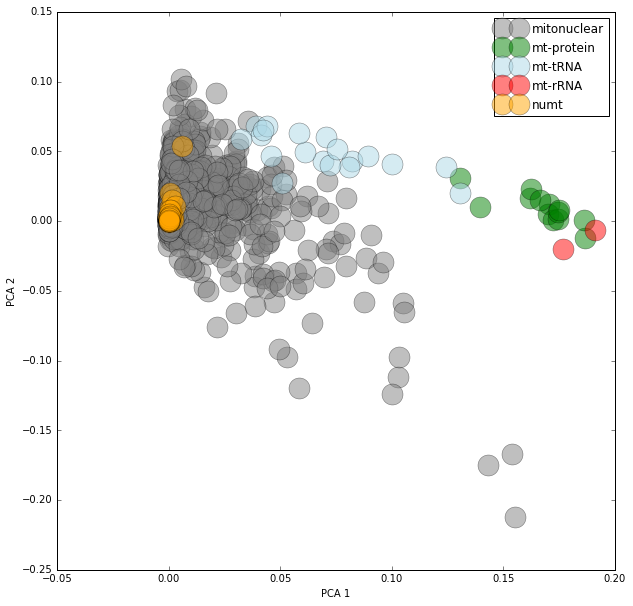

In [31]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

# PCA1 and PCA2 for all samples, using genes to identify variation

plt.plot(pca1.components_[0][0:1127],pca1.components_[1][0:1127],'o',markersize=21, color='grey', alpha=0.5,label="mitonuclear")
plt.plot(pca1.components_[0][1127:(1127+37)][protein],pca1.components_[1][1127:(1127+37)][protein],'o',markersize=21, color='green', alpha=0.5,label="mt-protein")
plt.plot(pca1.components_[0][1127:(1127+37)][tRNA],pca1.components_[1][1127:(1127+37)][tRNA],'o',markersize=21, color='lightblue', alpha=0.5,label="mt-tRNA")
plt.plot(pca1.components_[0][1127:(1127+37)][rRNA],pca1.components_[1][1127:(1127+37)][rRNA],'o',markersize=21, color='red', alpha=0.5,label="mt-rRNA")
plt.plot(pca1.components_[0][(1127+37):1226],pca1.components_[1][(1127+37):1226],'o',markersize=21, color='orange', alpha=0.5,label="numt")

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

In [42]:
# PCA of matrix with rows=genes, column=samples

pca2 = PCA(n_components=2)
pca2 = pca2.fit(adjusted.iloc[:,2:].transpose())

In [43]:
pca2.explained_variance_ratio_

array([ 0.85856471,  0.08678707])

In [44]:
len(pca2.components_[0])

3282

In [45]:
pca2.n_samples_

1226

In [46]:
list(adjusted.iloc[:,1].drop_duplicates())

['Lung',
 'Brain - Amygdala',
 'Brain - Caudate (basal ganglia)',
 'Skin - Sun Exposed (Lower leg)',
 'Brain - Spinal cord (cervical c-1)',
 'Whole Blood',
 'Brain - Cortex',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Thyroid',
 'Brain - Putamen (basal ganglia)',
 'Brain - Cerebellum',
 'Brain - Substantia nigra',
 'Brain - Hypothalamus',
 'Brain - Frontal Cortex (BA9)',
 'Heart - Left Ventricle',
 'Cells - Leukemia cell line (CML)',
 'Muscle - Skeletal',
 'Adipose - Subcutaneous',
 'Brain - Cerebellar Hemisphere',
 'Brain - Anterior cingulate cortex (BA24)',
 'Artery - Tibial',
 'Brain - Hippocampus',
 'Pancreas',
 'Nerve - Tibial',
 'Breast - Mammary Tissue',
 'Artery - Aorta',
 'Heart - Atrial Appendage',
 'Adipose - Visceral (Omentum)',
 'Skin - Not Sun Exposed (Suprapubic)',
 'Prostate',
 'Cells - EBV-transformed lymphocytes',
 'Cells - Transformed fibroblasts',
 'Liver',
 'Artery - Coronary',
 'Pituitary',
 'Testis',
 'Esophagus - Mucosa',
 'Colon - Transverse',
 'Esophagus 

Populating the interactive namespace from numpy and matplotlib


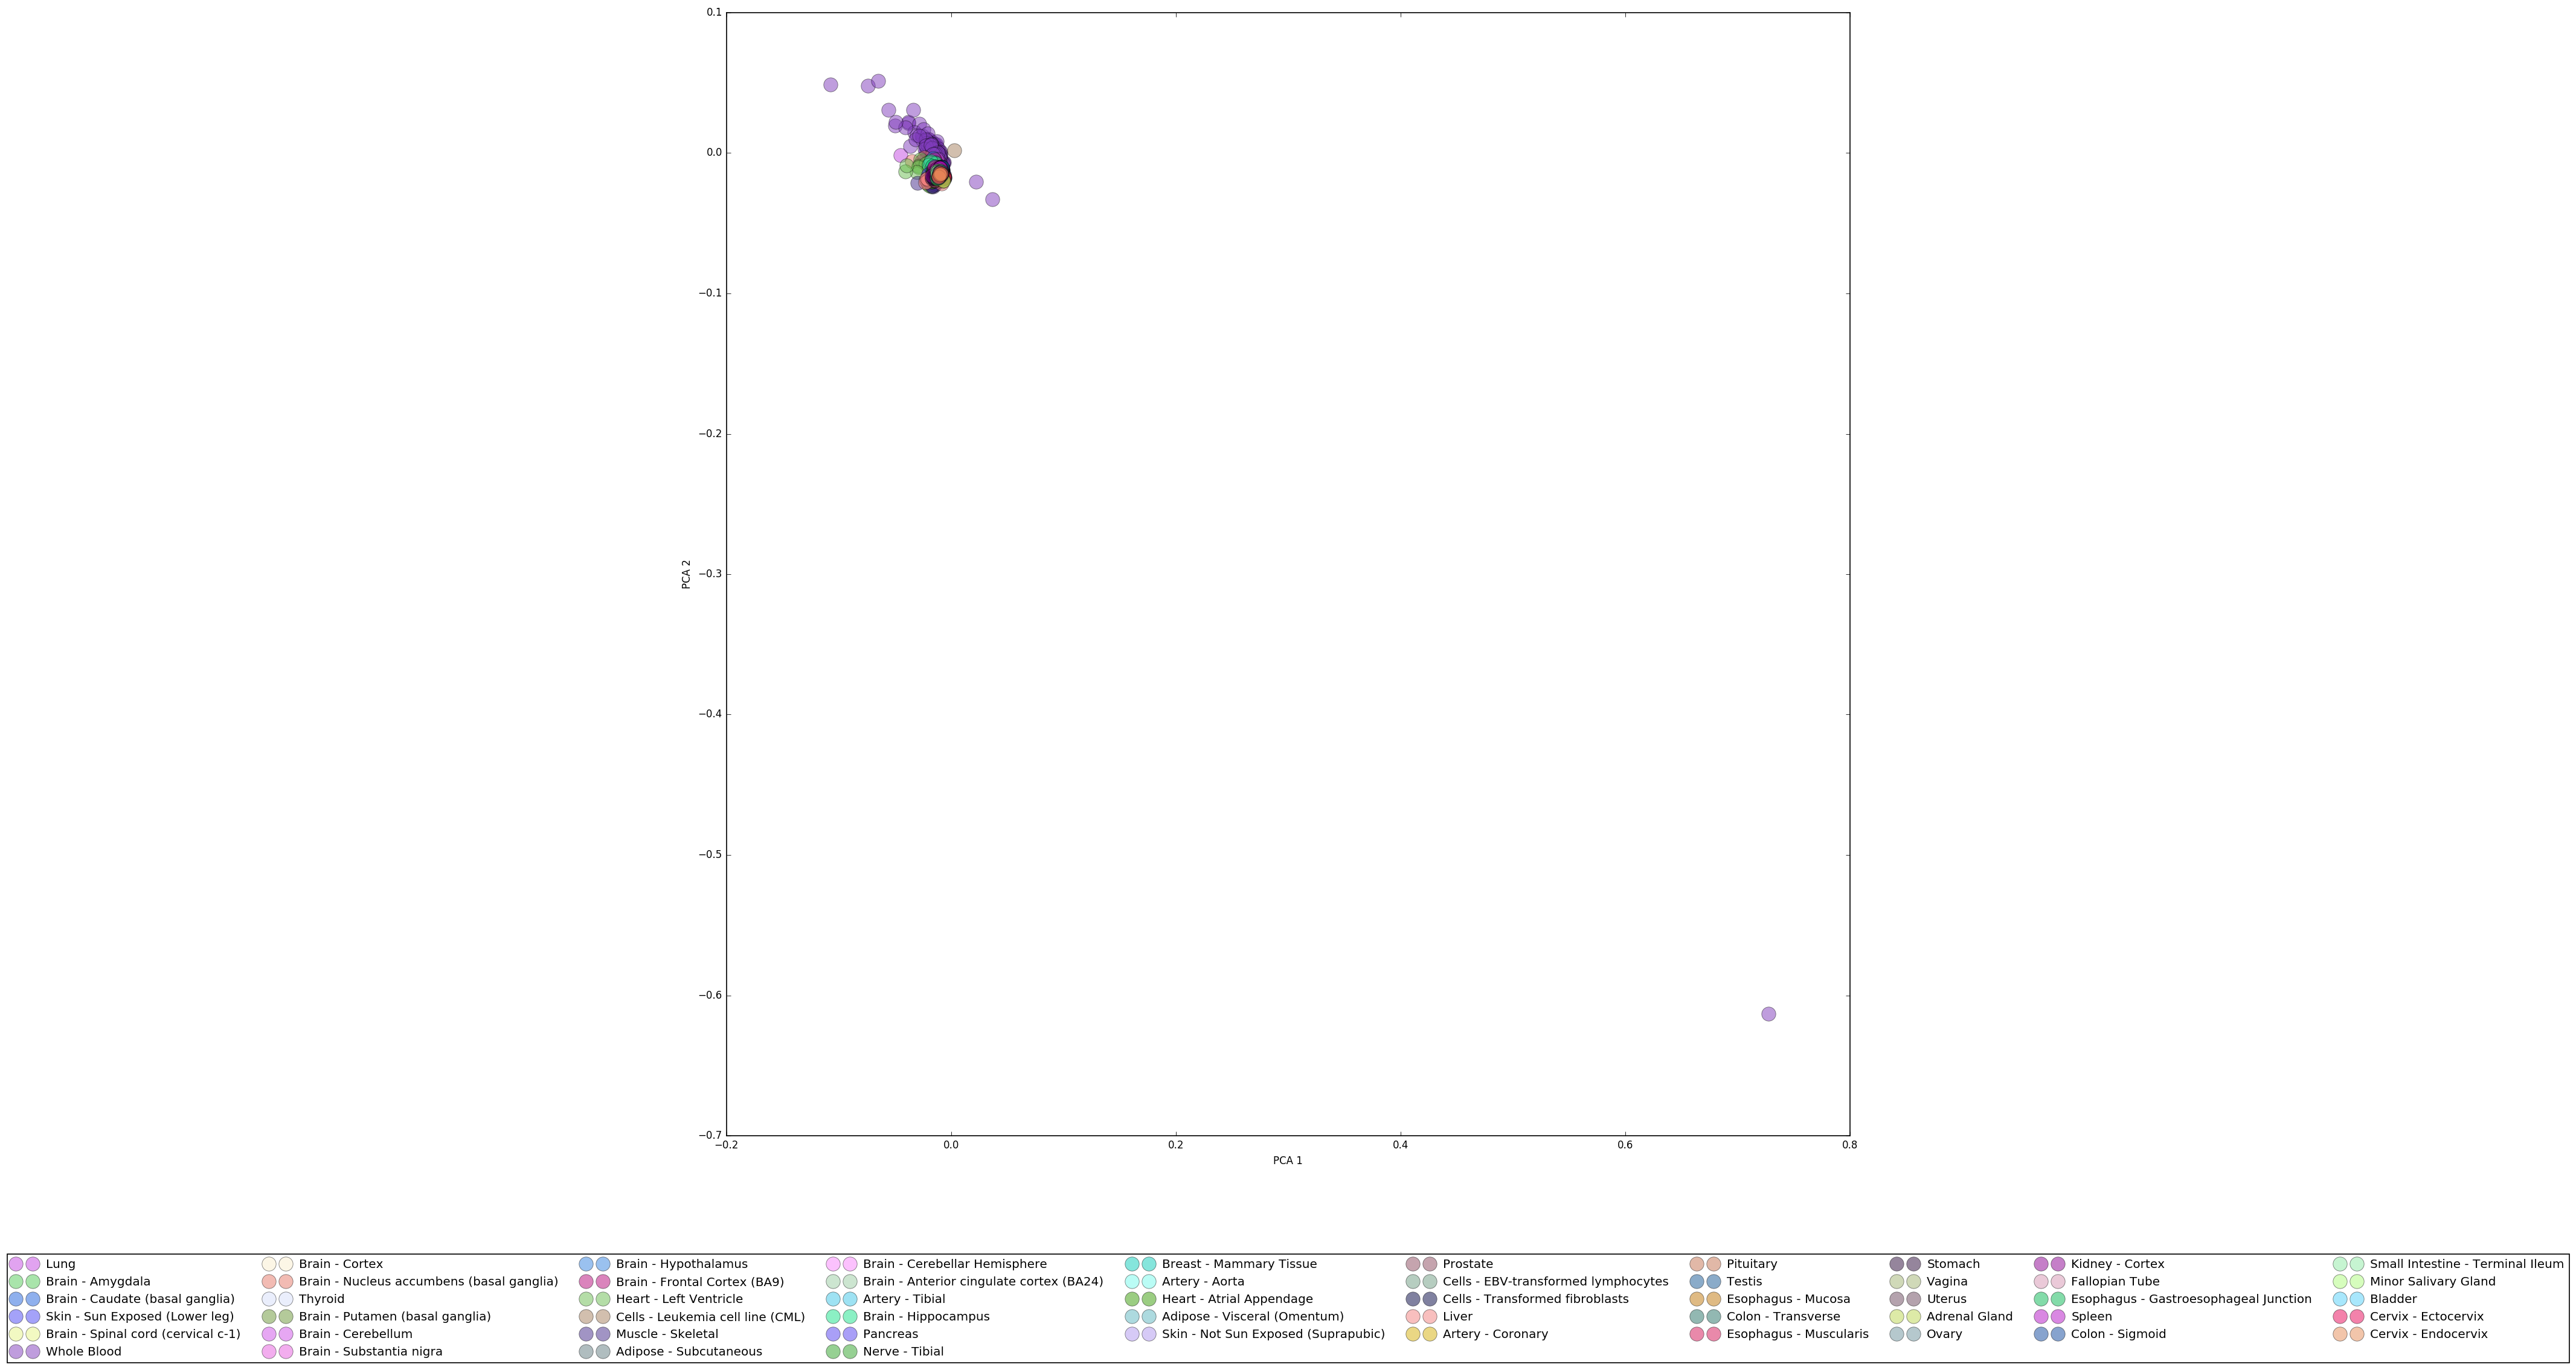

In [47]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
matplotlib.rcParams['savefig.dpi'] = 120

# PCA1 and PCA2 for all samples, using genes to identify variation
#plt.plot(pca2.components_[0],pca2.components_[1],'o',markersize=14, color='grey', alpha=0.5)
#plt.plot(pca2.components_[0][NPJ8],pca2.components_[1][NPJ8],'o',markersize=14, color='red', alpha=0.5)

#n=-1
for tissue in list(adjusted.iloc[:,1].drop_duplicates()):
    #n+=1
    current = list(adjusted[adjusted.iloc[:,1] == tissue].index)
    plt.plot(pca2.components_[0][current],pca2.components_[1][current],'o',markersize=14, color=numpy.random.rand(3,), 
             alpha=0.5,label=tissue)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=10)

In [ ]:
gtex = "GTEX_3282_sample_phenotype.txt"
unfiltered = pd.DataFrame()

with open (gtex) as samples:
    for sample in samples:
        individual, accession, tissue = sample.strip().split('\t')[:3]
        current_tsv = accession+".tsv"
        current_dataframe = pd.read_csv(current_tsv,sep="\t")
        current_dataframe = current_dataframe.tpm
        out = pd.Series([individual,tissue]).append(current_dataframe)
        out.index = range(len(out))
        unfiltered = unfiltered.append(out,ignore_index=True)

In [ ]:
unfiltered.to_csv("all_samples_unfiltered_tpm_matrix_3282.txt",sep="\t",header=False,index=False)

In [48]:
#sampledata = pd.read_table("SRR1068687.tsv")

In [ ]:
# mitochondrial gene expression = median of 13 genes, divided by the median expression of the 

In [1]:
! ls unfilt*

ls: cannot access unfilt*: No such file or directory


In [1]:
import pandas as pd

In [2]:
# counts without normalization
raw = pd.read_csv("mitonuc_mito_numt_tpm_matrix_3282.txt",sep="\t",header=None)

# normalized by median HK gene expression
norma = pd.read_csv("adjusted_matrix_log_tpm.txt", sep="\t")


In [3]:
raw.columns = norma.columns

In [4]:
# column index of protein coding mitochondrial genes
cds_mito = [i for i in range(1129,1166) if not list(raw.columns[i].split("-")[1])[0] in ['T','R']]

In [5]:
raw_mito = raw.iloc[:,[0,1]+cds_mito]

In [6]:
norma_mito = norma.iloc[:,[0,1]+cds_mito]

In [83]:
raw_nuclear = raw.iloc[:,0:1127]
norma_nuclear = norma.iloc[:,0:1127]

In [84]:
raw_nuclear_log = raw_nuclear.iloc[:,2:].apply(np.log10,axis=1)

In [85]:
raw_nuclear = pd.concat([norma_nuclear.iloc[:,0:2],raw_nuclear_log],axis=1)

In [86]:
raw_nuclear["mean_expression"] = raw_nuclear.iloc[:,2:].apply(np.mean,axis=1)
norma_nuclear["mean_expression"] = norma_nuclear.iloc[:,2:].apply(np.mean,axis=1)

In [7]:
import numpy as np

In [8]:
from matplotlib import pyplot as plt

In [9]:
raw_mito_log = raw_mito.iloc[:,2:].apply(np.log10,axis=1)

In [11]:
raw_mito = pd.concat([norma_mito.iloc[:,0:2],raw_mito_log],axis=1)

In [19]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [24]:
raw_mito["mean_expression"] = raw_mito.iloc[:,2:].apply(np.mean,axis=1)
norma_mito["mean_expression"] = norma_mito.iloc[:,2:].apply(np.mean,axis=1)

/home/boris/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [60]:
import statsmodels.api as sm

In [61]:
from statsmodels.formula.api import ols

In [72]:
mod_raw = ols('mean_expression ~ tissue + individual',
                data=raw_mito).fit()


mod_norma = ols('mean_expression ~ tissue + individual',
                data=norma_mito).fit()

In [74]:
aov_table_raw = sm.stats.anova_lm(mod_raw, typ=1)
aov_table_norma = sm.stats.anova_lm(mod_norma, typ=1)

In [75]:
print aov_table_raw

              df  sum_sq  mean_sq   F  PR(>F)
tissue        53     NaN      NaN NaN     NaN
individual   212     NaN      NaN NaN     NaN
Residual    3017     NaN      NaN NaN     NaN


In [76]:
print aov_table_norma

              df        sum_sq    mean_sq         F        PR(>F)
tissue        53    842.952159  15.904758  0.996275  4.824082e-01
individual   212   5754.838242  27.145463  1.700393  4.758717e-09
Residual    3017  48164.073115  15.964227       NaN           NaN


In [87]:
mod_raw_nuclear = ols('mean_expression ~ tissue + individual',
                data=raw_nuclear).fit()


mod_norma_nuclear = ols('mean_expression ~ tissue + individual',
                data=norma_nuclear).fit()

In [88]:
aov_table_raw_nuclear = sm.stats.anova_lm(mod_raw_nuclear, typ=1)
aov_table_norma_nuclear = sm.stats.anova_lm(mod_norma_nuclear, typ=1)

In [89]:
print aov_table_raw_nuclear

              df  sum_sq  mean_sq   F  PR(>F)
tissue        53     NaN      NaN NaN     NaN
individual   212     NaN      NaN NaN     NaN
Residual    3017     NaN      NaN NaN     NaN


In [90]:
aov_table_norma_nuclear

,df,sum_sq,mean_sq,F,PR(>F)
tissue,53,13.139003,0.247906,4.845810,4.346803e-27
individual,212,19.997178,0.094326,1.843795,1.117174e-11
Residual,3017,154.346027,0.051159,NaN,NaN


In [93]:
hk_genes = data2
hk_genes.columns = ["individual","tissue"] + d2_names

In [95]:
hk_genes["mean_expression"] = hk_genes.iloc[:,2:].apply(np.mean,axis=1)

In [96]:
mod_raw_hk = ols('mean_expression ~ tissue + individual',
                data=hk_genes).fit()

In [97]:
aov_table_raw_hk = sm.stats.anova_lm(mod_raw_hk, typ=1)

In [98]:
print aov_table_raw_hk

              df         sum_sq       mean_sq          F        PR(>F)
tissue        53  571203.337502  10777.421462  53.273142  0.000000e+00
individual   212  143652.218848    677.604806   3.349422  2.260540e-47
Residual    3017  610354.101902    202.304972        NaN           NaN


In [102]:
hk_genes.iloc[:3,2:15]

,PGD,RBM8A,ADAR,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,92.2379,9.33487,13.32070,19.0070,0.00000,7.36282,100.7820,36.7098,23.0669,0.495578,23.3047,9.60972,109.053
1,33.9931,10.58120,1.67556,17.9455,0.24523,2.64121,41.1460,10.8809,13.0656,0.457474,26.3536,8.22370,284.552
2,43.3681,15.68290,5.13380,25.8892,1.28273,6.19069,56.8016,19.4830,21.3160,0.962535,50.5071,6.56541,424.298


In [103]:
def adjustDF(x):
    median_hk = np.log10(np.median(x[2:15]))
    values = np.log10(list(x[2:15]+1))
    adjusted = values/median_hk
    
    return pd.Series(adjusted)

In [104]:
adjusted_hk = hk_genes.apply(adjustDF,axis=1)

In [106]:
adjusted_hk.columns = hk_genes.columns[2:15]

In [107]:
adjusted_hk.head(2)

,PGD,RBM8A,ADAR,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,1.540051,0.793099,0.903864,1.017412,0.000000,0.721200,1.569825,1.232651,1.080151,0.136686,1.08349,0.802012,1.596356
1,1.489375,1.026131,0.412298,1.232323,0.091881,0.541396,1.567292,1.036834,1.107550,0.157815,1.38619,0.930778,2.368832


In [108]:
adjusted_hk = pd.concat([hk_genes.iloc[:,0:2],adjusted_hk], axis=1)

In [109]:
adjusted_hk.head(2)

,individual,tissue,PGD,RBM8A,ADAR,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,GTEX-PW2O,Lung,1.540051,0.793099,0.903864,1.017412,0.000000,0.721200,1.569825,1.232651,1.080151,0.136686,1.08349,0.802012,1.596356
1,GTEX-NPJ8,Brain - Amygdala,1.489375,1.026131,0.412298,1.232323,0.091881,0.541396,1.567292,1.036834,1.107550,0.157815,1.38619,0.930778,2.368832


In [110]:
adjusted_hk["mean_expression"] = adjusted_hk.iloc[:,2:].apply(np.mean,axis=1)

In [111]:
mod_adj_hk = ols('mean_expression ~ tissue + individual',
                data=adjusted_hk).fit()

In [112]:
aov_table_adj_hk = sm.stats.anova_lm(mod_adj_hk, typ=1)

In [113]:
print aov_table_adj_hk

              df       sum_sq   mean_sq         F        PR(>F)
tissue        53    13.634742  0.257259  0.390747  9.999791e-01
individual   212   240.418521  1.134050  1.722490  1.939887e-09
Residual    3017  1986.326178  0.658378       NaN           NaN
